In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression


In [11]:
# Data generator function (scaled sinusoidal)
def true_fun(X):
    # Scales the result of the sinusoidal function (approximately between 200,000 and 3,000,000)
    return 1.4e6 + 1.3e6 * np.cos(1.5 * np.pi * (X - 45_000) / 85_000)


In [12]:
# Data generation
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.uniform(45_000, 130_000, n_samples))  # Prices between 45,000 and 130,000
y = true_fun(X) + np.random.normal(0, 130_000, n_samples)     # Added noise


In [13]:
# Common settings for the plots
plot_size = (9, 6)
X_test = np.linspace(45_000, 130_000, 100)

# Hexadecimal colors
colore_blu = "#1a559e"
colore_rosa = "#e71d71"
colore_linea_distanza = "#0070c0"

# Graph texts (labels remain in Italian)
x_label = "Prezzo (€)"
y_label = "Quantità venduta (Mln)"


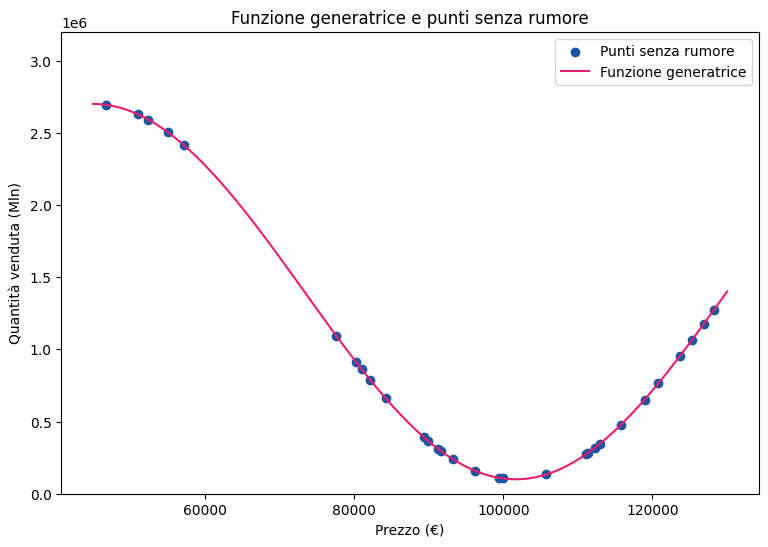

In [ ]:
# Plot 1: Graph with generator function and points without noise
plt.figure(figsize=plot_size)
plt.scatter(X, true_fun(X), color=colore_blu, label="Punti senza rumore")
plt.plot(X_test, true_fun(X_test), label="Funzione generatrice", color=colore_rosa)
plt.ylim(0, 3_200_000)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("Funzione generatrice e punti senza rumore")
plt.legend()
plt.show()


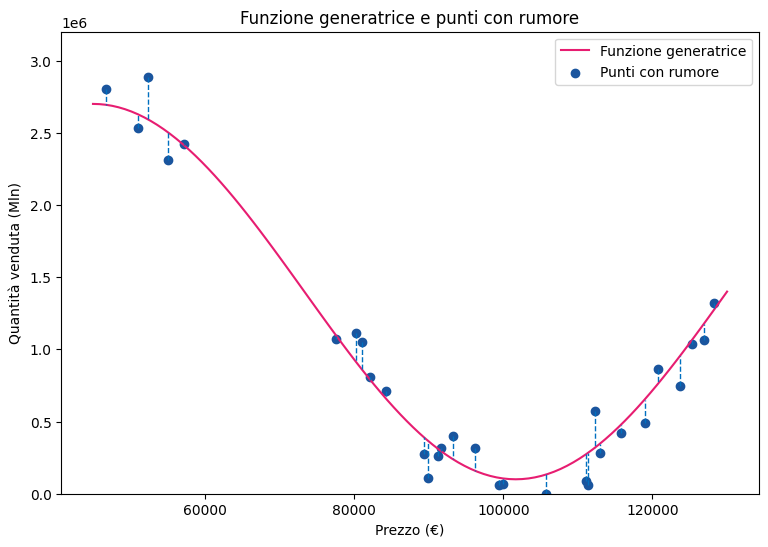

In [ ]:
# Plot 2: Graph with generator function and points with noise + distance lines
plt.figure(figsize=plot_size)
plt.plot(X_test, true_fun(X_test), label="Funzione generatrice", color=colore_rosa)
plt.scatter(X, y, color=colore_blu, label="Punti con rumore")

# Add dashed lines to highlight vertical distance
for x_val, y_val in zip(X, y):
    plt.plot([x_val, x_val], [y_val, true_fun(x_val)],
             color=colore_linea_distanza, linestyle='--', linewidth=1)

plt.ylim(0, 3_200_000)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("Funzione generatrice e punti con rumore")
plt.legend()
plt.show()


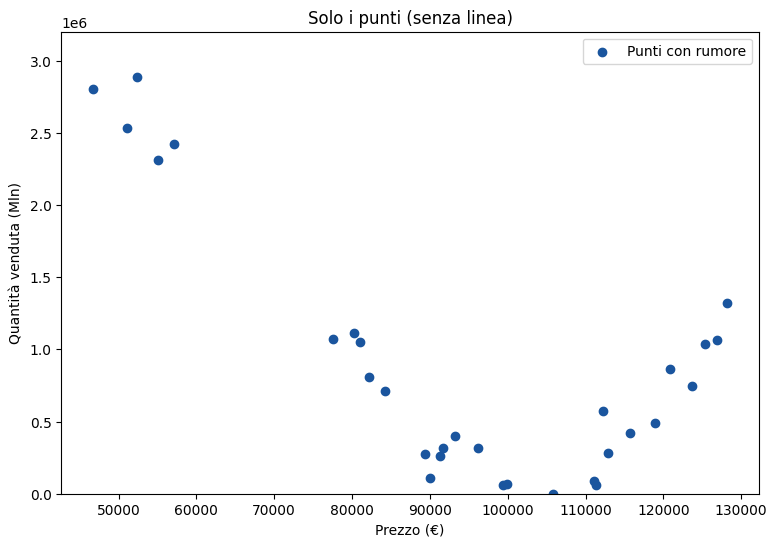

In [16]:
# Plot 3: Graph with only points (no line)
plt.figure(figsize=plot_size)
plt.scatter(X, y, color=colore_blu, label="Punti con rumore")
plt.ylim(0, 3_200_000)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("Solo i punti (senza linea)")
plt.legend()
plt.show()


In [17]:
# General settings for the plots
xmin, xmax = 45_000, 130_000

# Data normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))  # Scale X between 0 and 1
X_test = np.linspace(xmin, xmax, 100).reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)            # Also normalize X_test


In [18]:
# Overfitting model
degree = 13  # Same degree as in the code you liked
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_scaled, y)  # Now using normalized X


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=13)),
                ('linearregression', LinearRegression())])

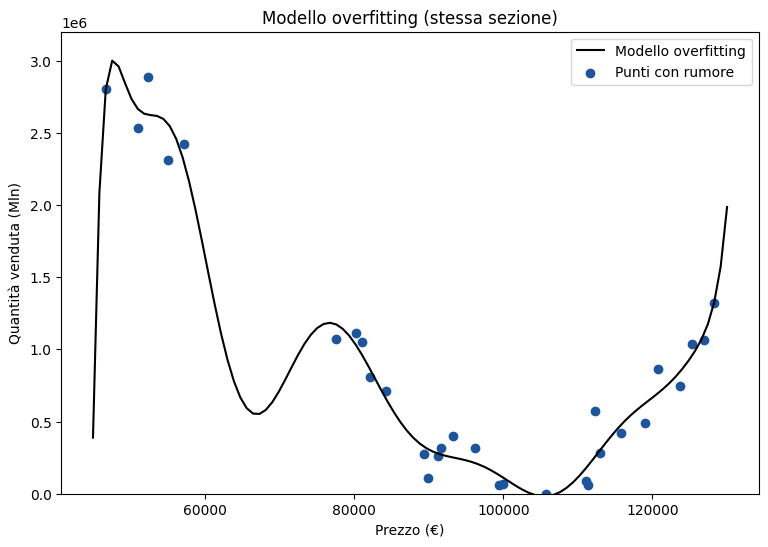

In [19]:
# Plot 4.1: Graph with overfitting curve (model prediction only)
plt.figure(figsize=(9, 6))
plt.plot(X_test, model.predict(X_test_scaled), 
         label="Modello overfitting", color="black")  # Black line (solid)
plt.scatter(X, y, color="#1a559e", label="Punti con rumore")
plt.ylim(0, 3_200_000)  # Y-axis limits adapted to sales
plt.xlabel("Prezzo (€)")
plt.ylabel("Quantità venduta (Mln)")
plt.title("Modello overfitting (stessa sezione)")
plt.legend()
plt.show()


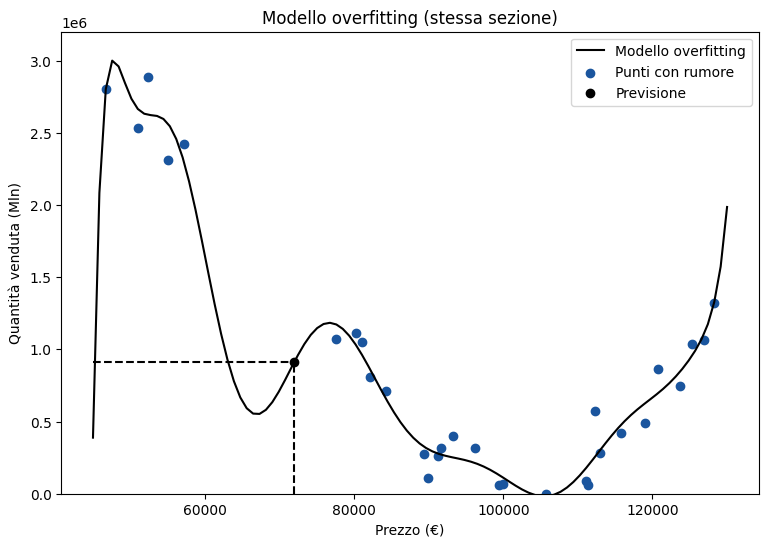

In [20]:
# Plot 4.2: Graph with overfitting curve and prediction lines
plt.figure(figsize=(9, 6))
plt.plot(X_test, model.predict(X_test_scaled), 
         label="Modello overfitting", color="black")  # Black line (solid)
plt.scatter(X, y, color="#1a559e", label="Punti con rumore")
x = 72_000
x_scaled = scaler.transform([[x]])[0]
y_pred = model.predict([x_scaled])[0]
plt.plot([x, x], [0, y_pred], color="black", linestyle="--")
plt.plot([xmin, x], [y_pred, y_pred], color="black", linestyle="--")
plt.scatter([x], [y_pred], color="black", label="Previsione")
plt.ylim(0, 3_200_000)  # Y-axis limits adapted to sales
plt.xlabel("Prezzo (€)")
plt.ylabel("Quantità venduta (Mln)")
plt.title("Modello overfitting (stessa sezione)")
plt.legend()
plt.show()


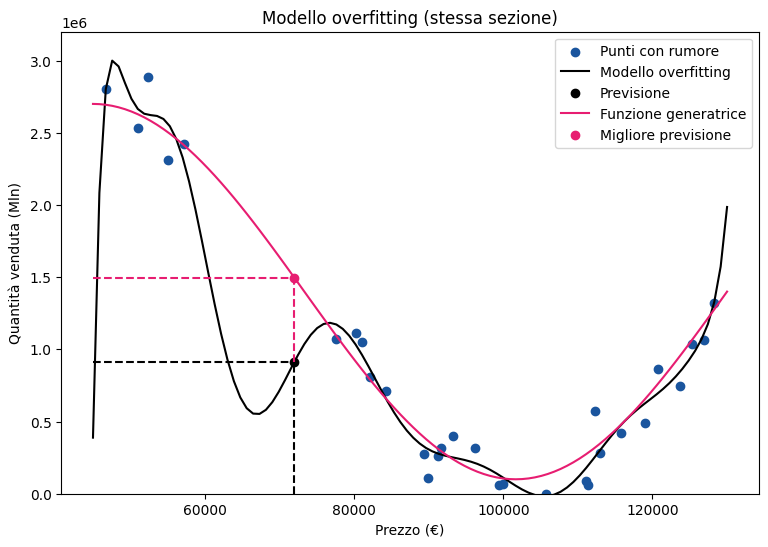

In [ ]:
# Plot 4.3: Graph with overfitting curve, prediction lines, and true function curve
plt.figure(figsize=(9, 6))
plt.scatter(X, y, color="#1a559e", label="Punti con rumore")
plt.plot(X_test, model.predict(X_test_scaled), 
         label="Modello overfitting", color="black")  # Black line (solid)
plt.plot([x, x], [0, y_pred], color="black", linestyle="--")
plt.plot([xmin, x], [y_pred, y_pred], color="black", linestyle="--")
plt.scatter([x], [y_pred], color="black", label="Previsione")
plt.plot([xmin, x], [true_fun(x), true_fun(x)], color="#e71d71", linestyle="--")
plt.plot([x, x], [y_pred, true_fun(x)], color="#e71d71", linestyle="--")
plt.plot(X_test, true_fun(X_test), label="Funzione generatrice", color="#e71d71")

best_y_prediction = true_fun(x) # Same x as before, but now using the true function to get y, the best prediction
plt.scatter(x, best_y_prediction, color="#e71d71", label="Migliore previsione")
plt.ylim(0, 3_200_000)  # Y-axis limits adapted to sales
plt.xlabel("Prezzo (€)")
plt.ylabel("Quantità venduta (Mln)")
plt.title("Modello overfitting (stessa sezione)")
plt.legend()
plt.show()
